In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
import glob

## Utils

In [2]:
# Define a function to find the index of the maximum value in a list
def argmax_list(lst):
    return max(range(len(lst)), key=lst.__getitem__)

In [12]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
def plot_loss(title, dataframe):
    df = copy.deepcopy(dataframe)
    plt.style.use('seaborn-v0_8-bright')
    plt.figure(figsize=(12, 5))
    colors = {
        'train': 'olive',
        'validation': 'teal'
    }

    # plot multiple lines
    for phase in df['phase'].unique():
        per_phase_df = df[df['phase'] == phase]
        put_label = True
        for fold in per_phase_df['fold'].unique():
            per_fold_df = per_phase_df[per_phase_df['fold'] == fold]
            plt.plot((per_fold_df['epoch'].unique()).astype(int), per_fold_df['loss'], marker='', color=colors[phase], linewidth=2, alpha=1, label=f"{phase}" if put_label else None)
            plt.text(99, per_fold_df['loss'].iloc[-1], fold, horizontalalignment='left', size='small', color=colors[phase])
            if put_label:
                put_label = False
    # Change x axis limit
    plt.xlim(0,100)
    plt.legend()

    # Add titles
    plt.title(title, loc='left', fontsize=10, fontweight=0, color='black')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.show()


def plot_acc(title, dataframe):
    df = copy.deepcopy(dataframe)
    plt.style.use('seaborn-v0_8-bright')
    plt.figure(figsize=(12, 5))
    colors = {
        'train': 'olive',
        'validation': 'teal'
    }

    # plot multiple lines
    for phase in df['phase'].unique():
        per_phase_df = df[df['phase'] == phase]
        put_label = True
        for fold in per_phase_df['fold'].unique():
            per_fold_df = per_phase_df[per_phase_df['fold'] == fold]
            plt.plot((per_fold_df['epoch'].unique()).astype(int), per_fold_df['acc'], marker='', color=colors[phase], linewidth=2, alpha=1, label=f"{phase}" if put_label else None)
            plt.plot((per_fold_df['epoch'].unique()).astype(int), per_fold_df['true_acc'], marker=11, color=colors[phase], linewidth=1, alpha=0.4, label=f"{phase}-true_labels" if put_label else None)
            plt.text(99, per_fold_df['acc'].iloc[-1], fold, horizontalalignment='left', size='small', color=colors[phase])
            plt.text(99, per_fold_df['true_acc'].iloc[-1], fold, horizontalalignment='left', size='small', color=colors[phase])
            if put_label:
                put_label = False
    # Change x axis limit
    plt.xlim(0,100)
    plt.legend()

    # Add titles
    plt.title(title, loc='left', fontsize=10, fontweight=0, color='black')
    plt.xlabel("Epoch")
    plt.ylabel("Acc")

    plt.show()

## Code

### Options

In [4]:
all_models=["resnet18", "resnet34", "xception"]
all_datasets=['cifar10']
all_optim = ['adam', 'sgd', 'rmsprobe', 'sparseadam']
all_initialization = ['pretrain', 'kaiming_normal']
all_lr_scheduler = ['reduceLR', 'none', 'cosine_annealingLR']
all_noise_injection = ["0.0", "0.03", "0.07", "0.13"]
all_noise_sparsity = ["0.0", "0.2", "0.4", "0.6"]
all_lr_rate = ['0.1', '0.001']
all_folds = ['0', '1', '2']
all_phase = ['train', 'validation']
all_epochs = 100
device = 'cuda:0'

### Calculate Metrics

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


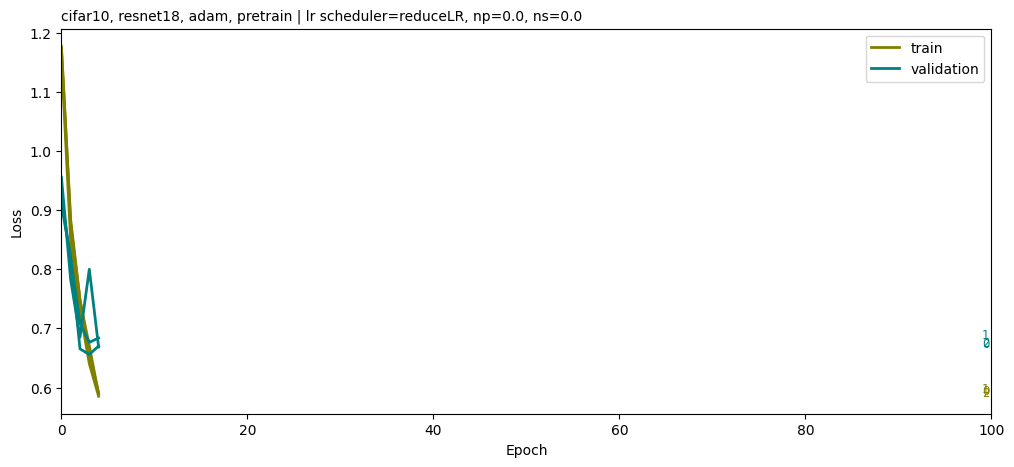

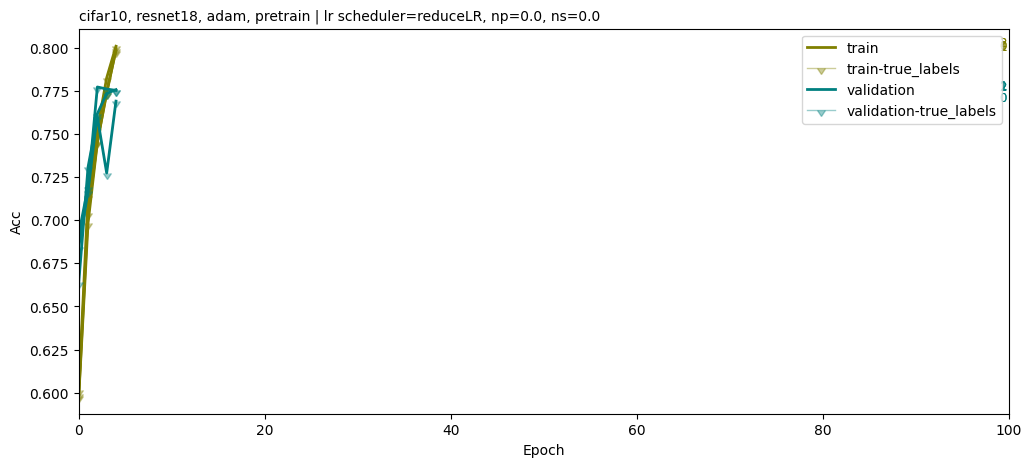

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


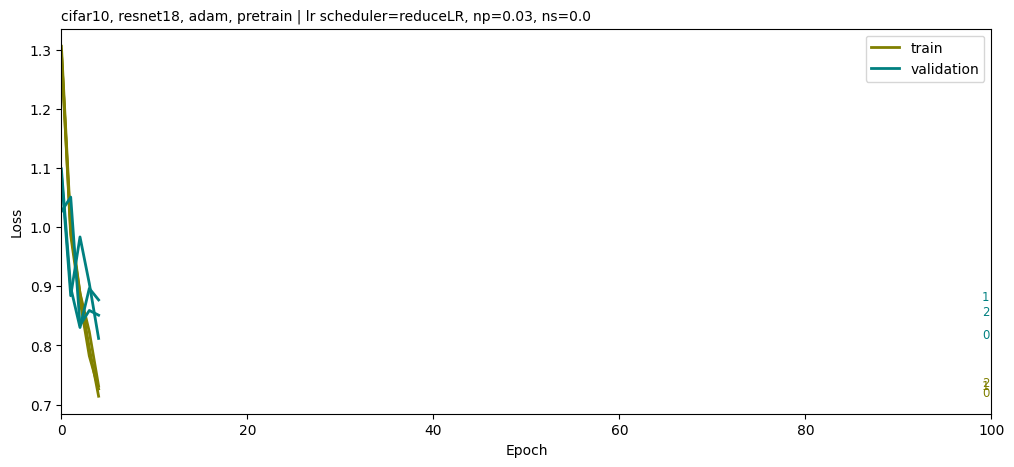

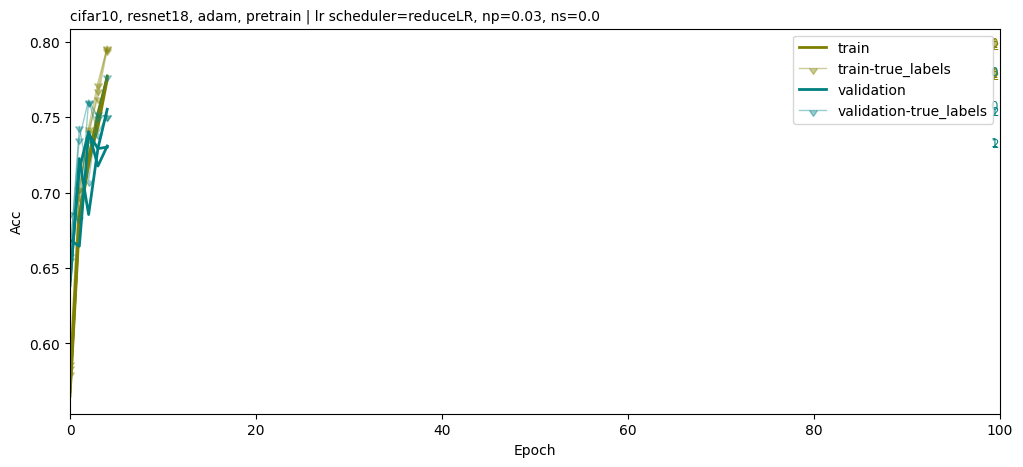

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


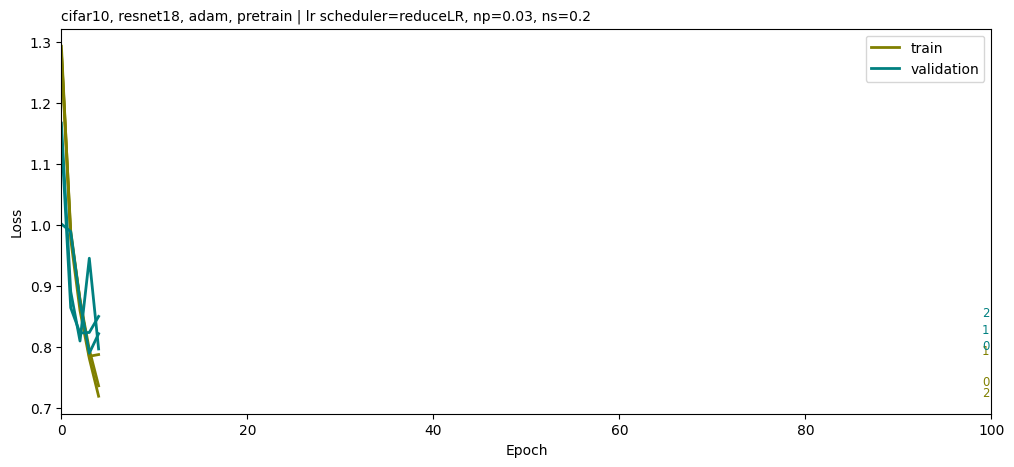

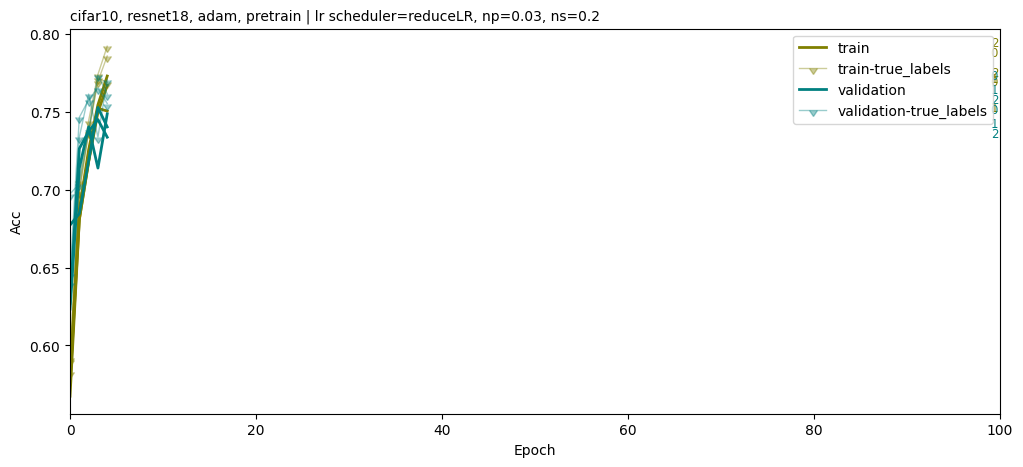

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


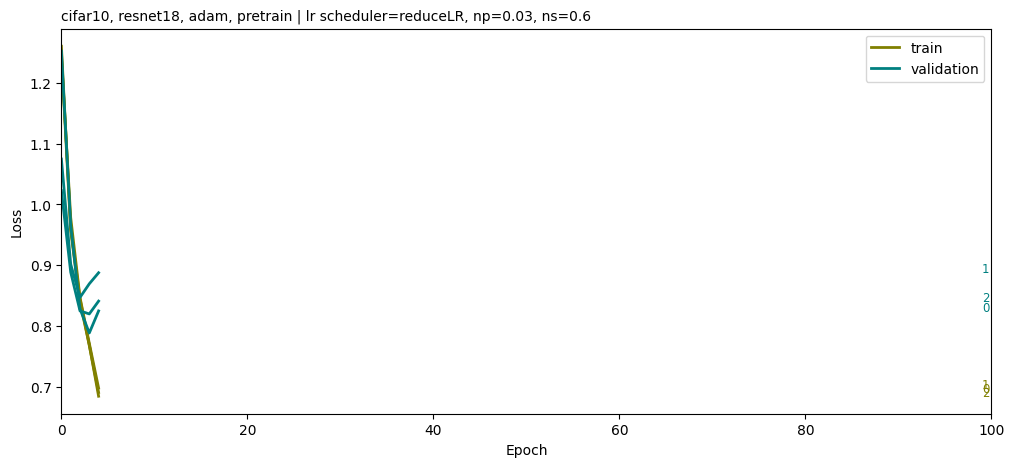

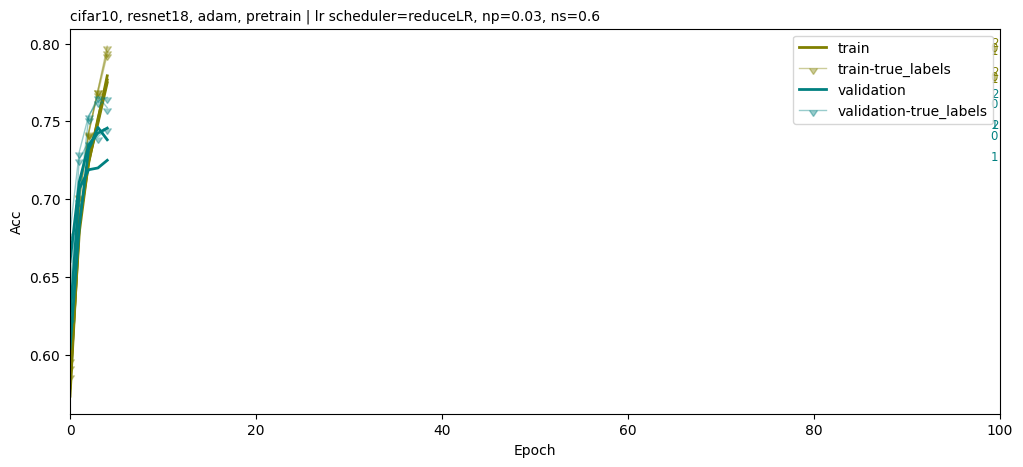

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


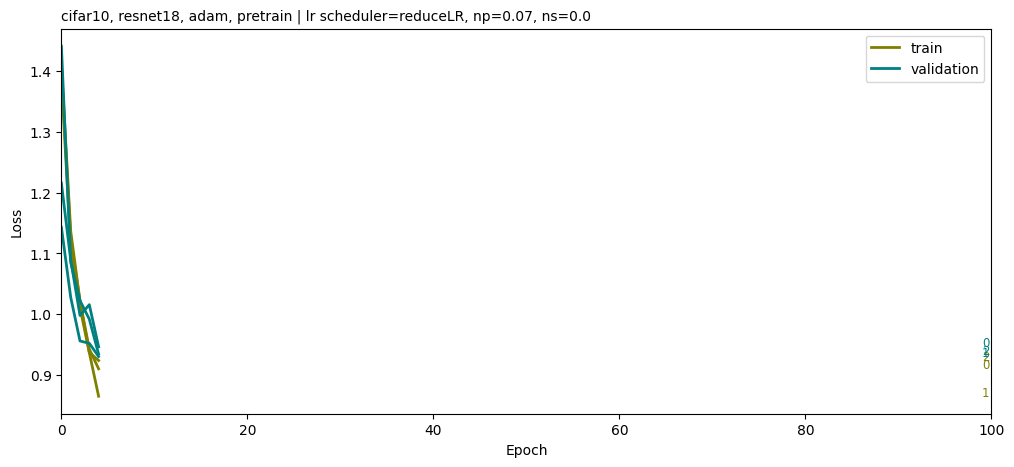

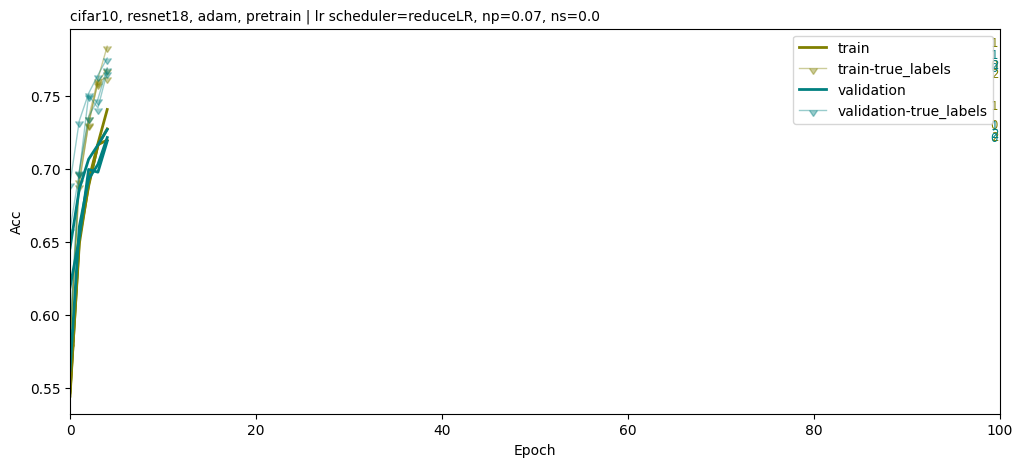

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


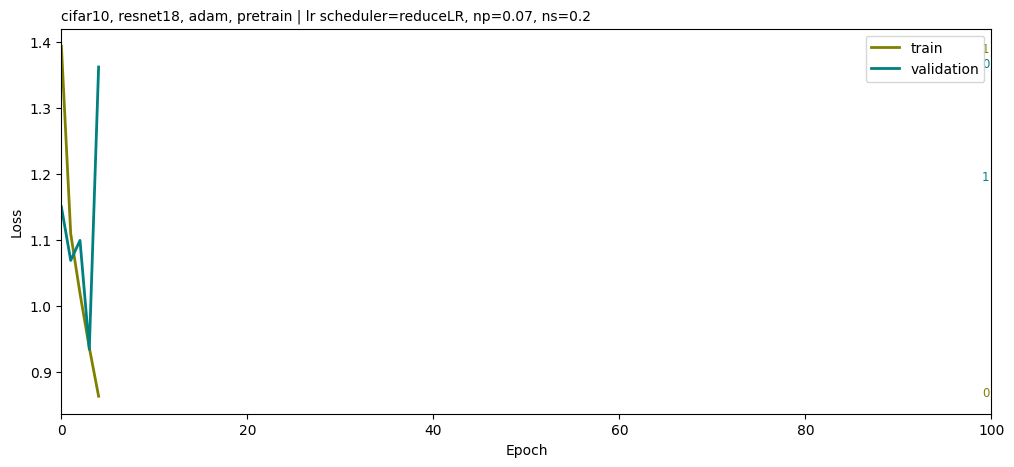

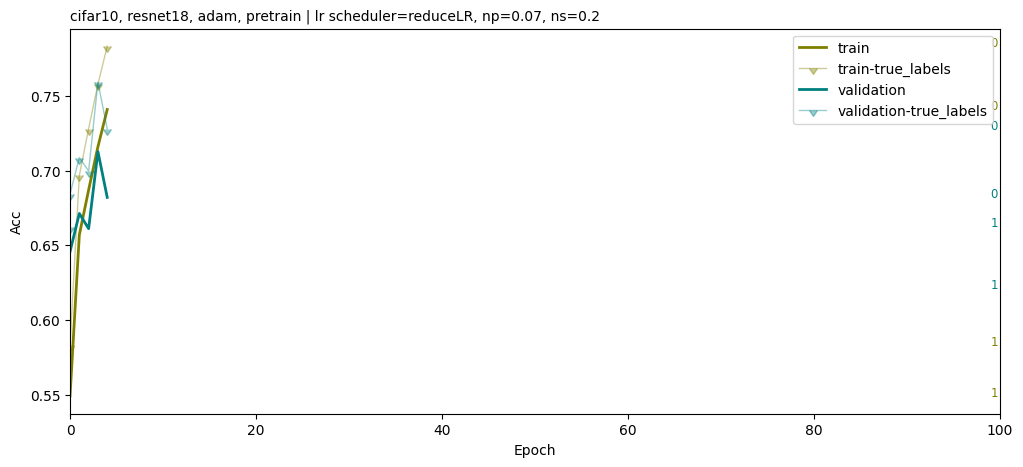

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


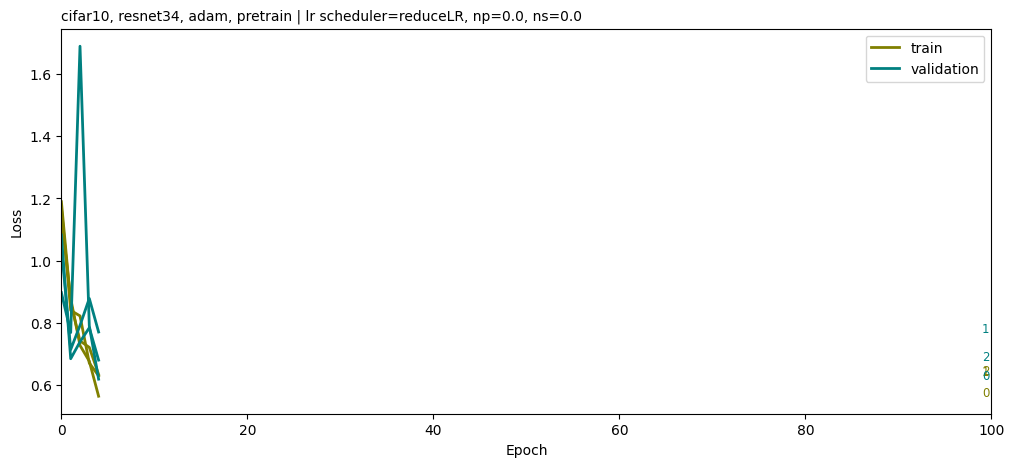

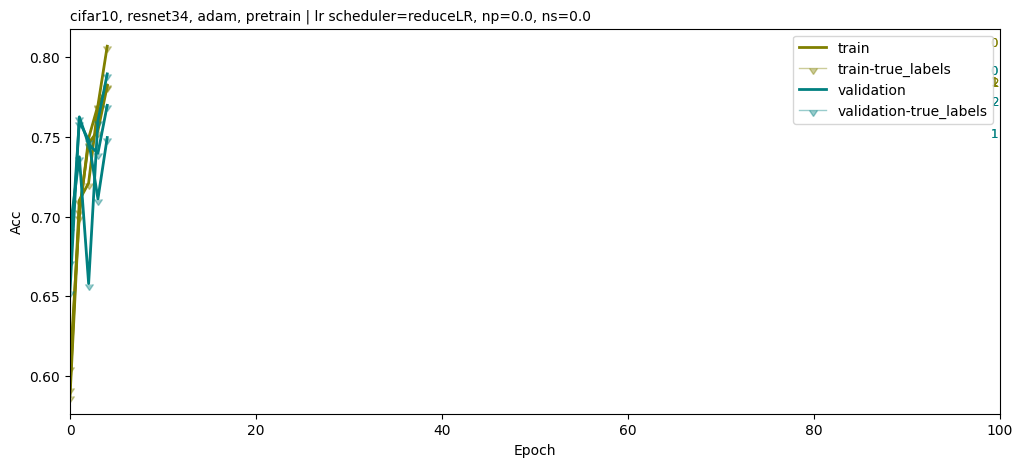

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


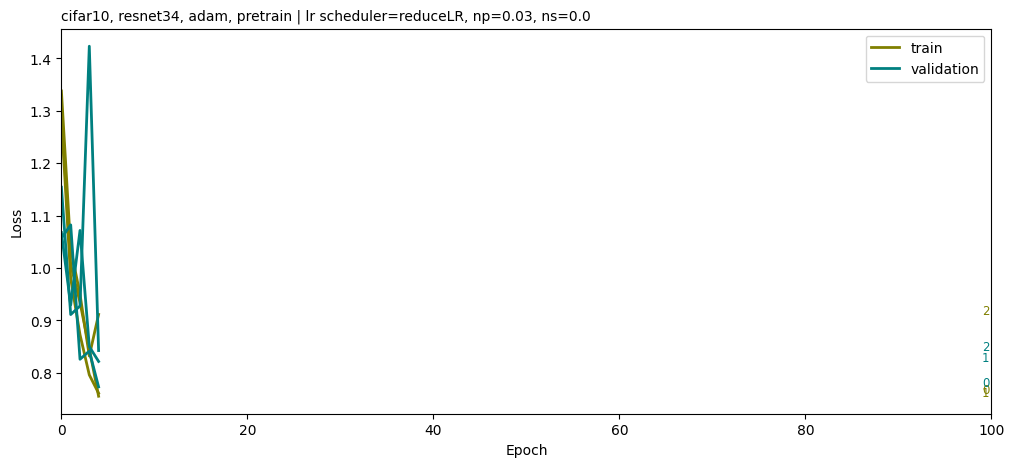

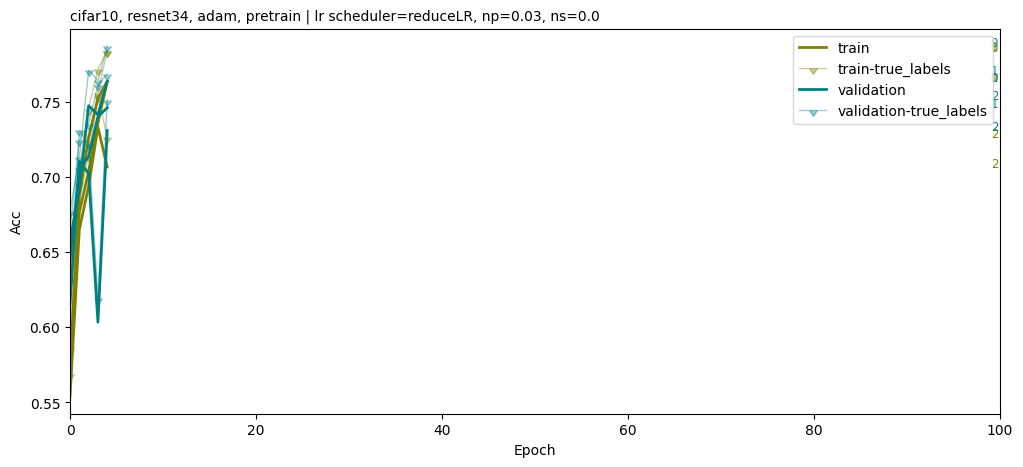

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


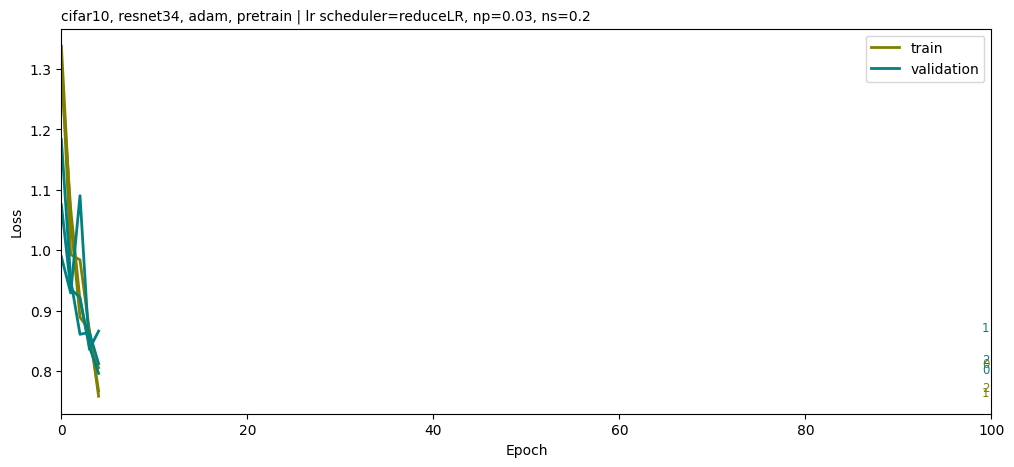

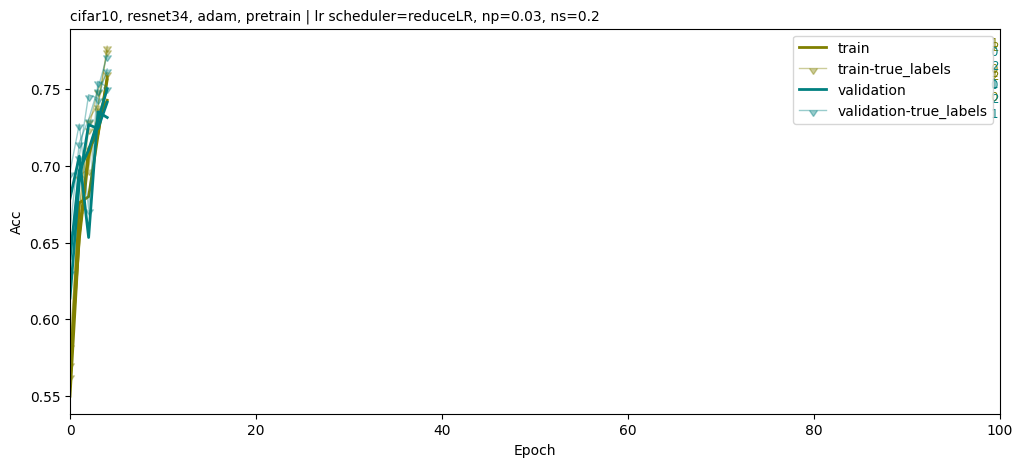

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


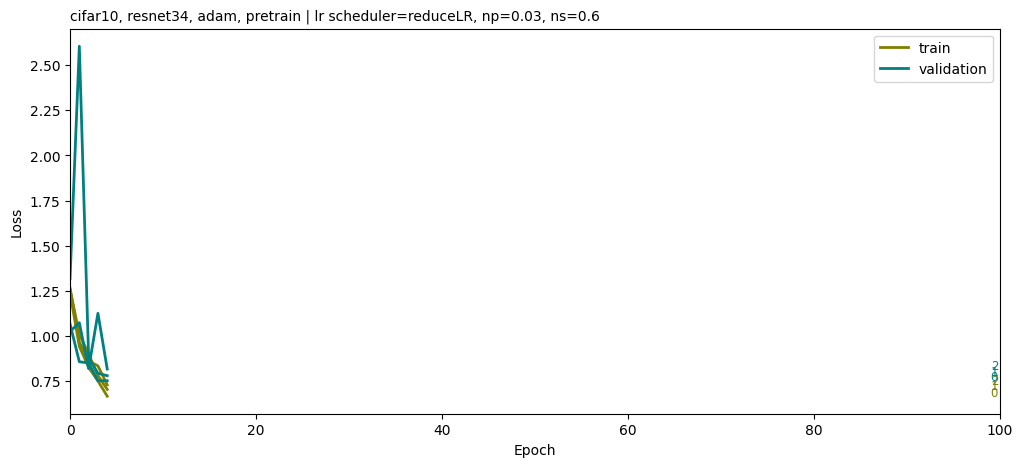

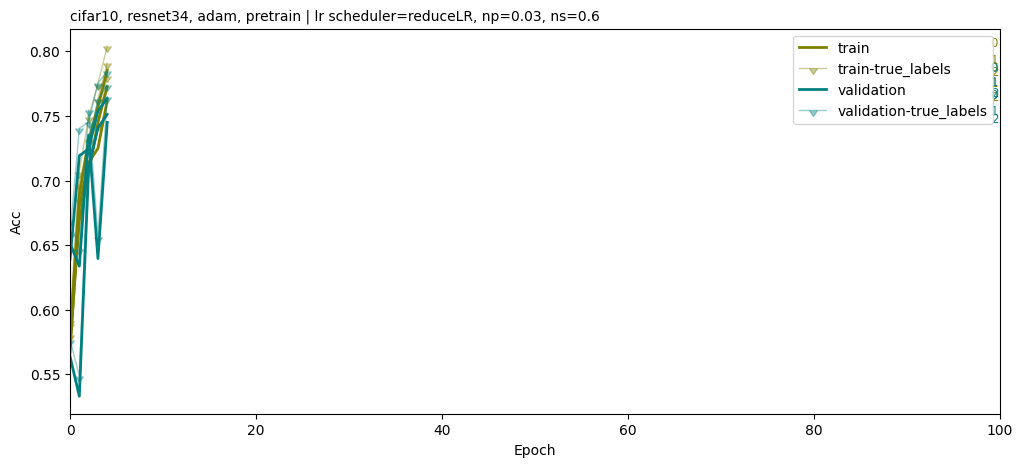

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


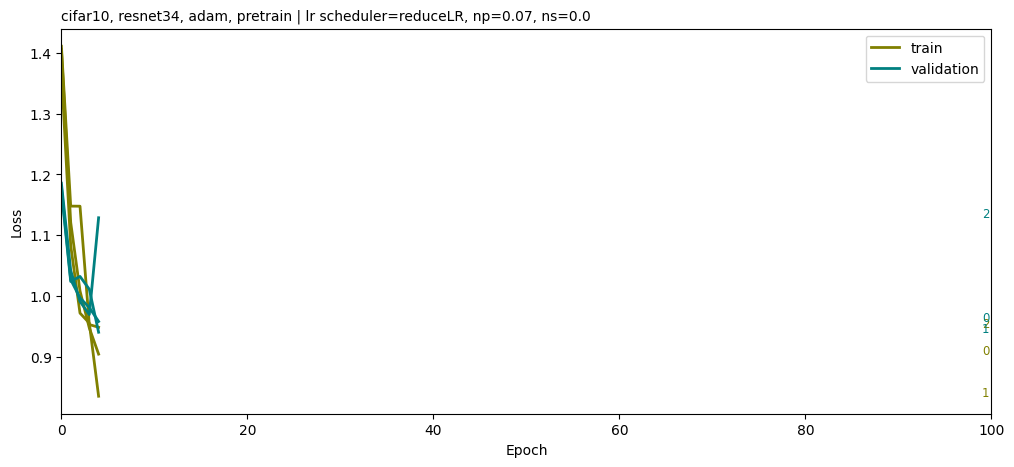

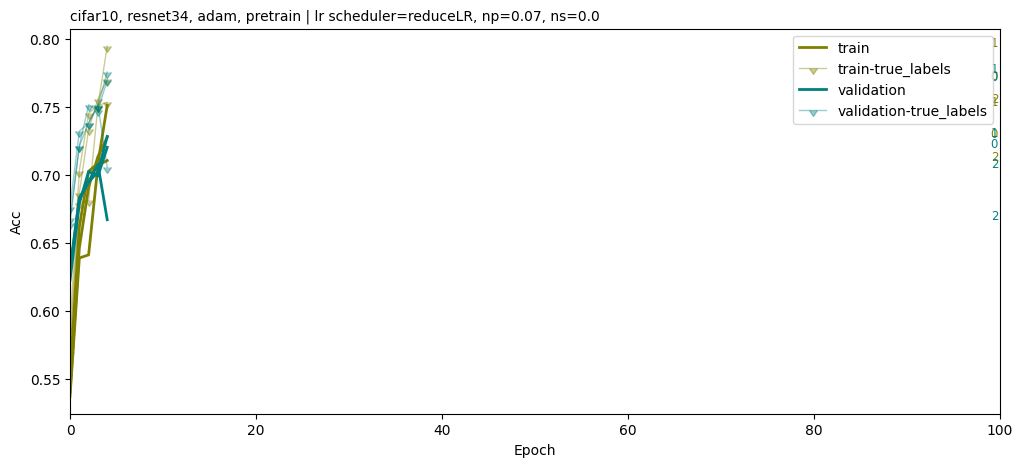

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


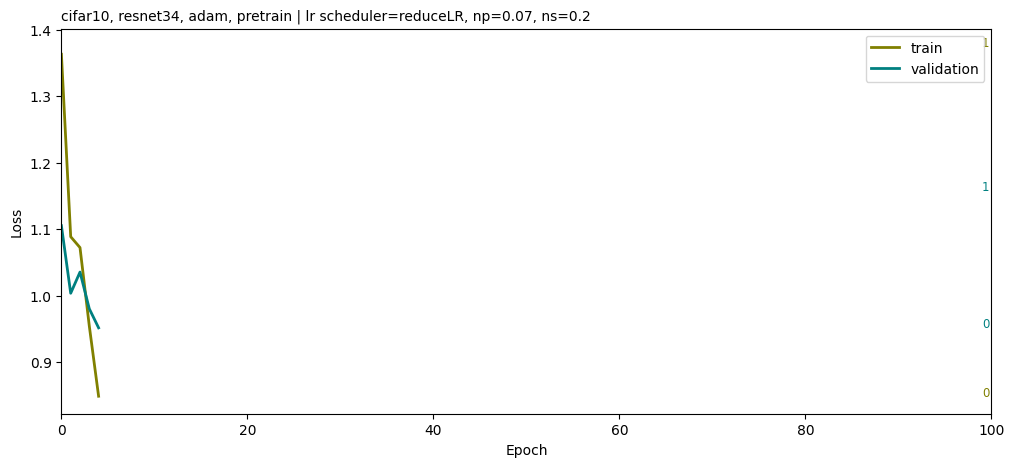

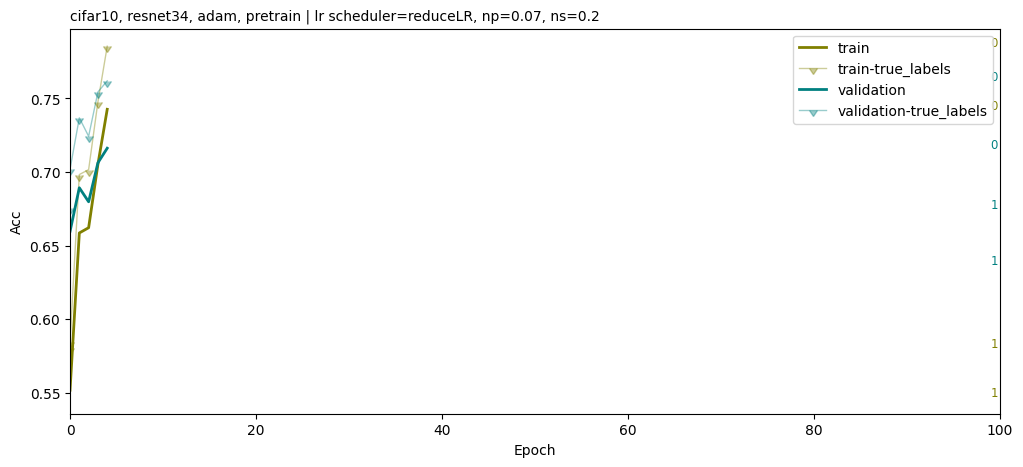

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


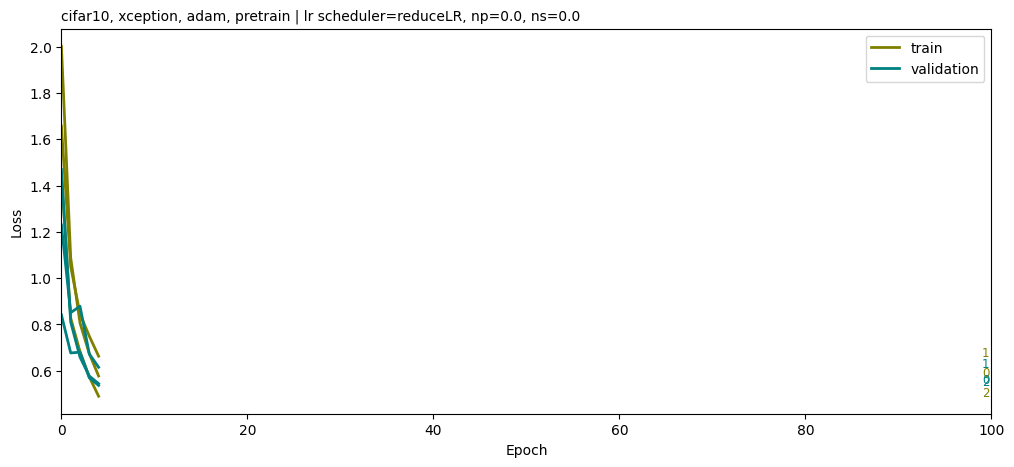

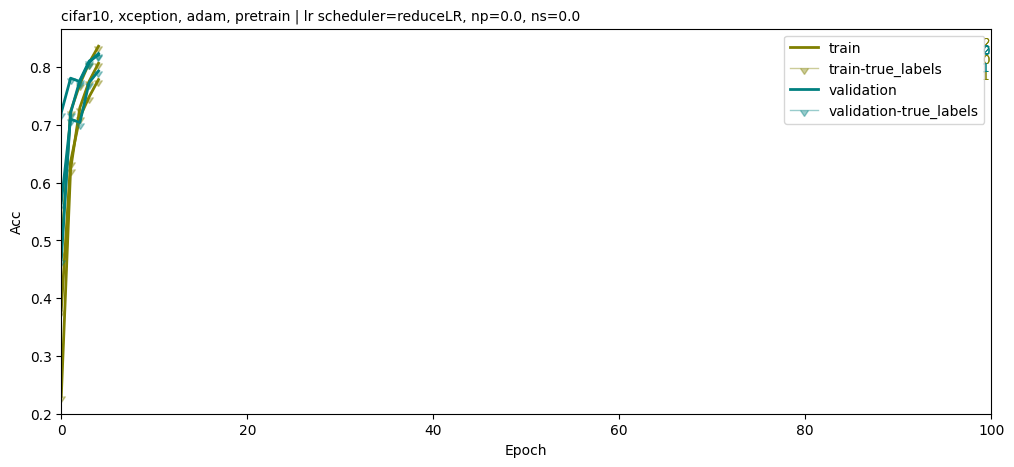

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


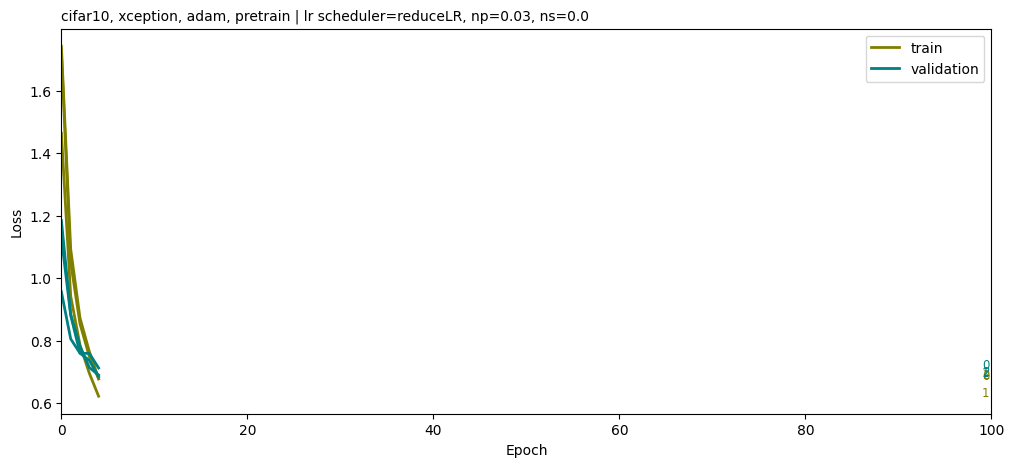

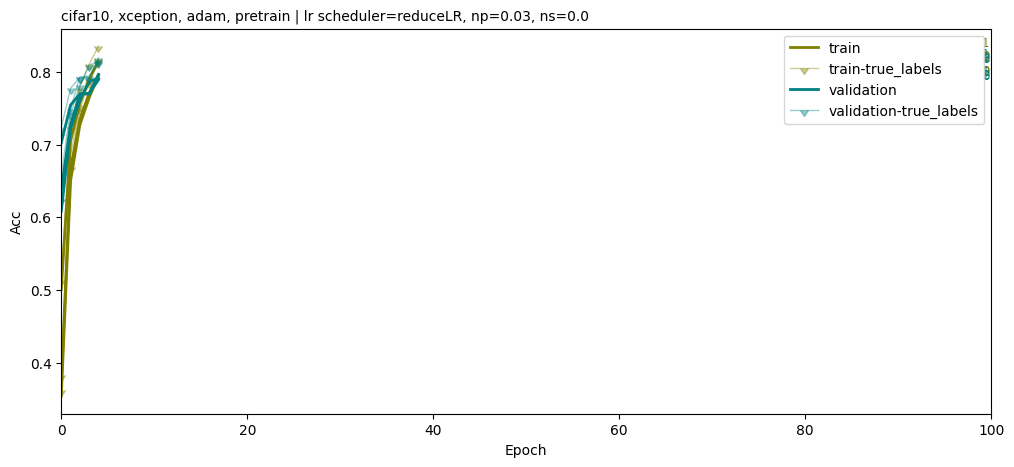

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


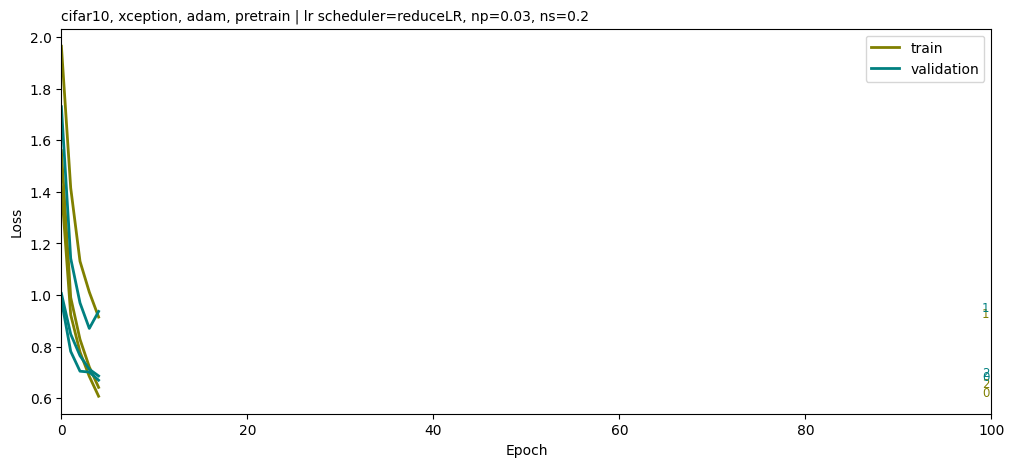

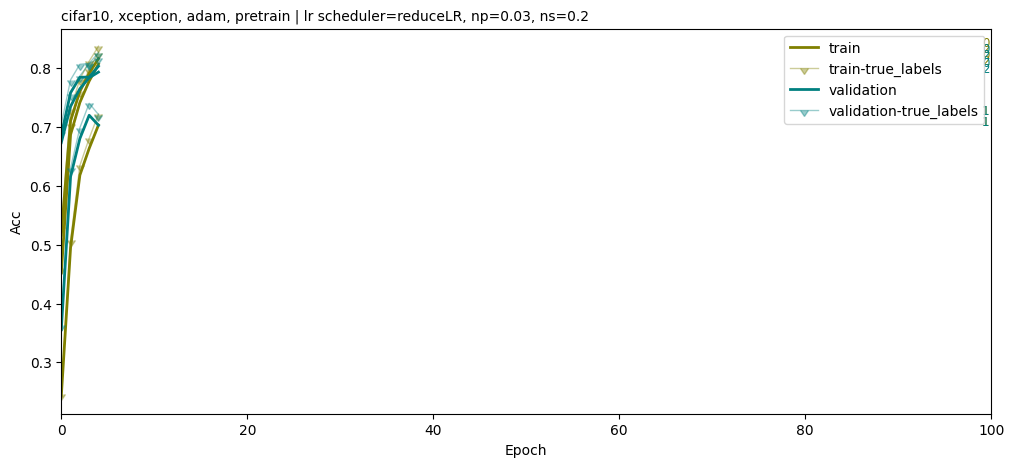

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


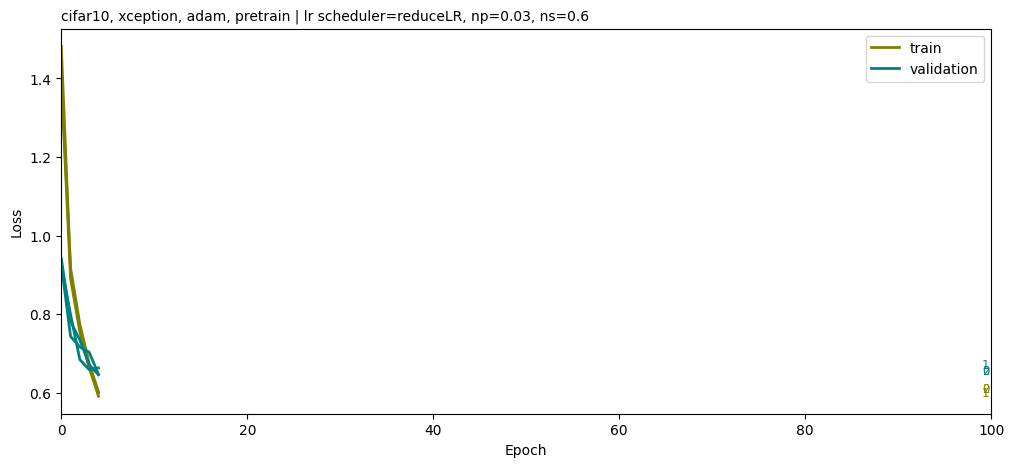

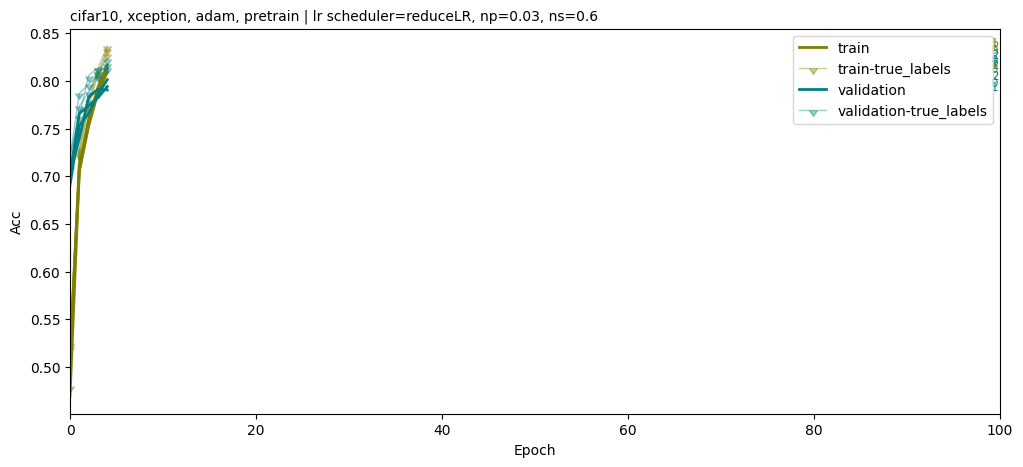

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


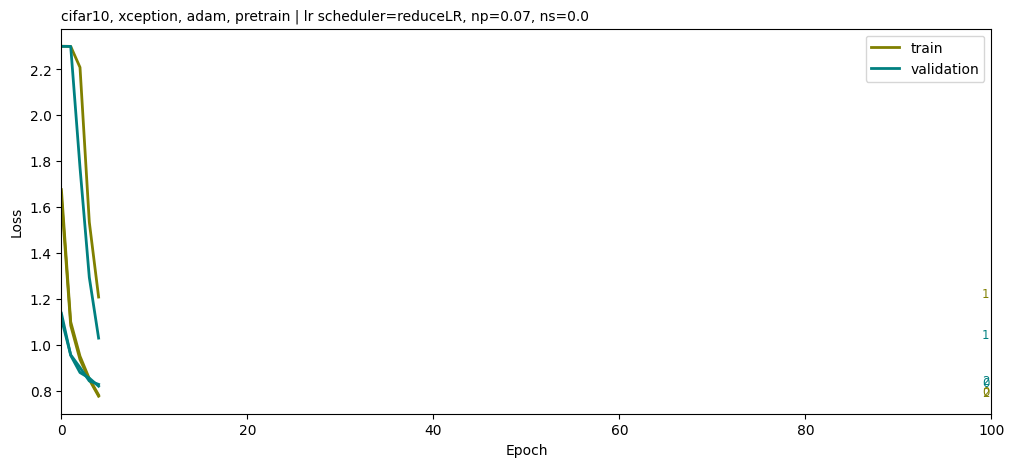

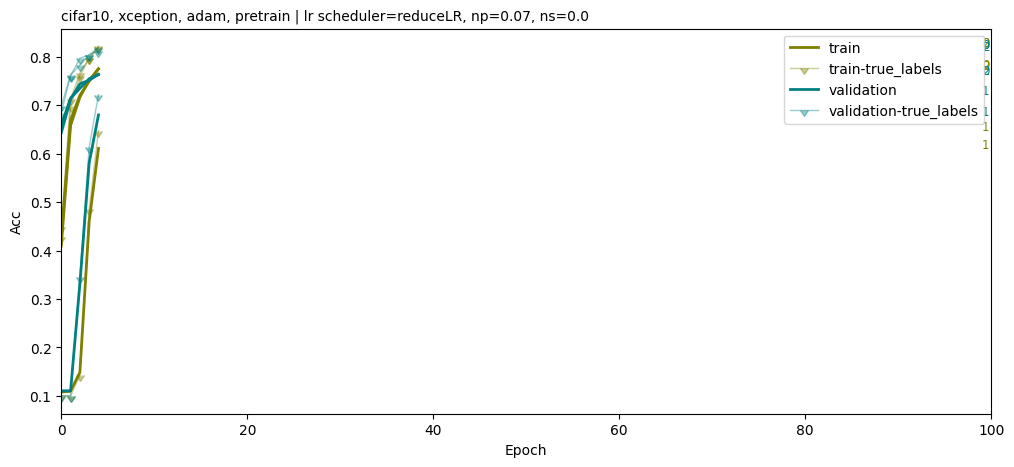

/tmp/ipykernel_323900/687276757.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loss_acc = loss_acc._append(data_dict, ignore_index=True)


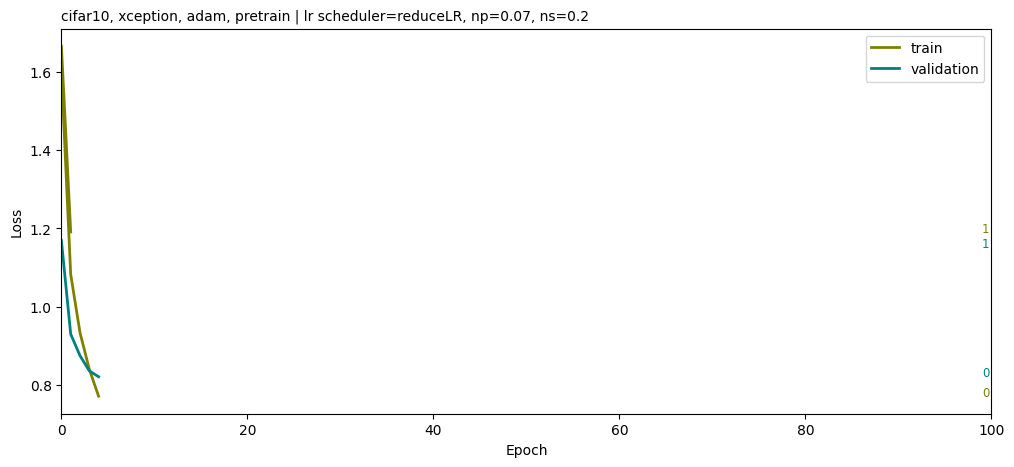

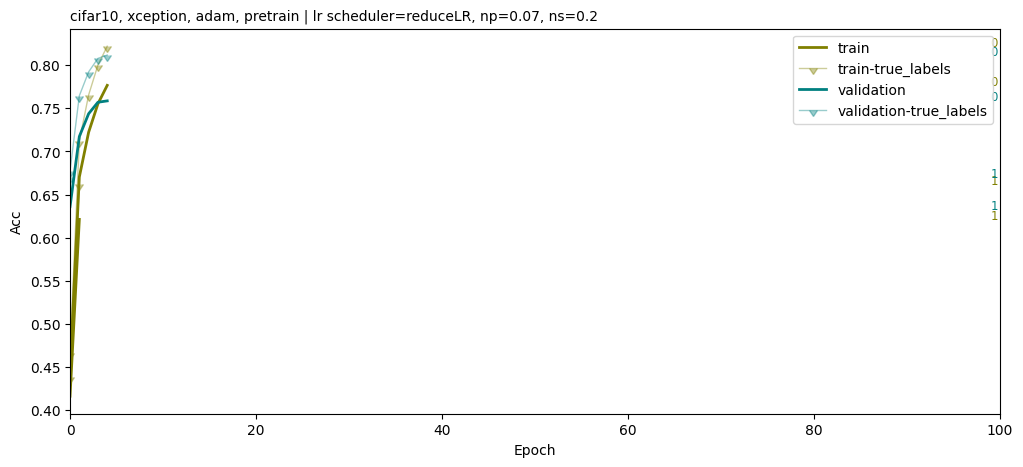

In [13]:
root = osp.join("/home/vision/Repo/cleanset/logs")
iterations_log = None
for dataset_name in all_datasets:
    dataset_info = pd.read_csv(f"dataset/{dataset_name}/info.csv")
    dataset_info[dataset_info['phase'] == 'train']
    for model_name in all_models:
        for optim in all_optim:
            for initialization in all_initialization:
                for lr_scheduler in all_lr_scheduler:
                    for noise_injection in all_noise_injection:
                        for noise_sparsity in all_noise_sparsity:
                            for lr_rate in all_lr_rate:
                                columns = {'epoch': int, 'loss': float, 'acc': float, 'true_acc': float, 'phase': str, 'fold': int}
                                loss_acc = pd.DataFrame(columns=columns.keys())
                                for phase in all_phase:
                                    for epoch in range(all_epochs):
                                        all_fold_loss = []
                                        epoch = f"{epoch :03d}"
                                        for fold in all_folds:
                                            glob_regex = osp.join(root,dataset_name, model_name, optim, initialization, lr_scheduler, f"np={noise_injection}", f"ns={noise_sparsity}", f"lr={lr_rate}", fold, phase, epoch, '*.pd')
                                            iterations_log = sorted(glob.glob(glob_regex))
                                            if len(iterations_log) == 0:
                                                continue
                                            iterations_log = [pd.read_pickle(file_path) for file_path in iterations_log]
                                            iterations_log = pd.concat(iterations_log, axis=0, ignore_index=True)
                                            iterations_log['phase'] = phase
                                            iterations_log.head()
                                            mean_loss = iterations_log['loss'].mean()
                                            # Apply the function to each row of the DataFrame and store the result in a new column
                                            iterations_log['prediction'] = iterations_log['proba'].apply(lambda x: argmax_list(x))
                                            iterations_log.drop(columns=['proba'], inplace=True)
                                            accuracy = (iterations_log['label'] == iterations_log['prediction']).mean()
                                            merged_df = pd.merge(iterations_log, dataset_info, left_on='sample', right_on='index', how='inner')
                                            true_accuracy = (merged_df['true_label'] == merged_df['prediction']).mean()
                                            data_dict = {'epoch': epoch, 'loss': mean_loss, 'acc': accuracy, 'true_acc': true_accuracy, 'phase': phase, 'fold': fold}
                                            loss_acc = loss_acc._append(data_dict, ignore_index=True)
                                if len(loss_acc):
                                    plot_loss(
                                        title=f"{dataset_name}, {model_name}, {optim}, {initialization} | lr scheduler={lr_scheduler}, np={noise_injection}, ns={noise_sparsity}", 
                                        dataframe=loss_acc)
                                    plot_acc(
                                        title=f"{dataset_name}, {model_name}, {optim}, {initialization} | lr scheduler={lr_scheduler}, np={noise_injection}, ns={noise_sparsity}", 
                                        dataframe=loss_acc)
                                    
